**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 3

**Datos de la entrega:** Lunes 20 de noviembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Daniel Araya Sambucci
- Esteban Leiva Montenegro


# Experimentación con regresión en redes neuronales artificiales

Indicaciones generales que deben seguir:
1. Se le proporciona el conjunto de datos y un archivo de texto con una breve explicación de las columnas (esta es la versión del dataset que debe usar, no busque similares en internet).
1. Realizarán regresión y el atributo a predecir es: **price**.
1. Ustedes deben ir tomando las decisiones en el proceso y documentarlas en celdas de texto y además su código debe venir ampliamente comentado. Recuerden que el profesor hace de cliente por si tienen dudas. 
1. Deben dividir el dataset en tres conjuntos de datos: train (60%), validation (20%) y test (20%).
1. Ustedes proponen el diseño experimental (quiero ver qué han entendido de este concepto fundamental en data science).
1. Deben utilizar **una de estas dos herramientas** para dar seguimiento a los resultados en el caso de la red neuronal artificial: 
    1. https://www.wandb.com/
    1. https://www.comet.ml/site/


Criterios de evaluación:
1. Deben presentar una implementación completa, en una de estas opciones: pytorch, tensorflow o keras (Claro que pueden usar numpy, pandas y otras bibliotecas más, para todo el tema de carga del dataset, analizarlo y pre-procesarlo). (**55 puntos**)
1. Uso de herramienta de seguimiento de resultados. (**10 puntos**)
1. Documentación de decisiones en celdas de texto y comentarios al código. (**20 puntos**)
1. Conclusiones finales: En una celda de texto al final del cuaderno, incluya sus conclusiones más importantes del experimento y algunos de los gráficos que genera la herramienta seleccionada, junto con su interpretación de los mismos. (**15 puntos**)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras import models
from tensorflow.keras import layers

import comet_ml




Load the dataset here

In [2]:
dataFrame = pd.read_csv('diamonds.csv', header =0, delimiter = ',')


___

# 1  -  Data Analytics
___

In [7]:
print(dataFrame.head() )#Show first 5 rows

   carat  depth  table  price     x     y     z  cut
0   0.23   61.5   55.0    326  3.95  3.98  2.43    4
1   0.21   59.8   61.0    326  3.89  3.84  2.31    3
2   0.23   56.9   65.0    327  4.05  4.07  2.31    1
3   0.29   62.4   58.0    334  4.20  4.23  2.63    3
4   0.31   63.3   58.0    335  4.34  4.35  2.75    1


In [8]:
dataFrame.describe() #Show a summary of the attributes over the whole dataset

,carat,depth,table,price,x,y,z,cut
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.904097
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000


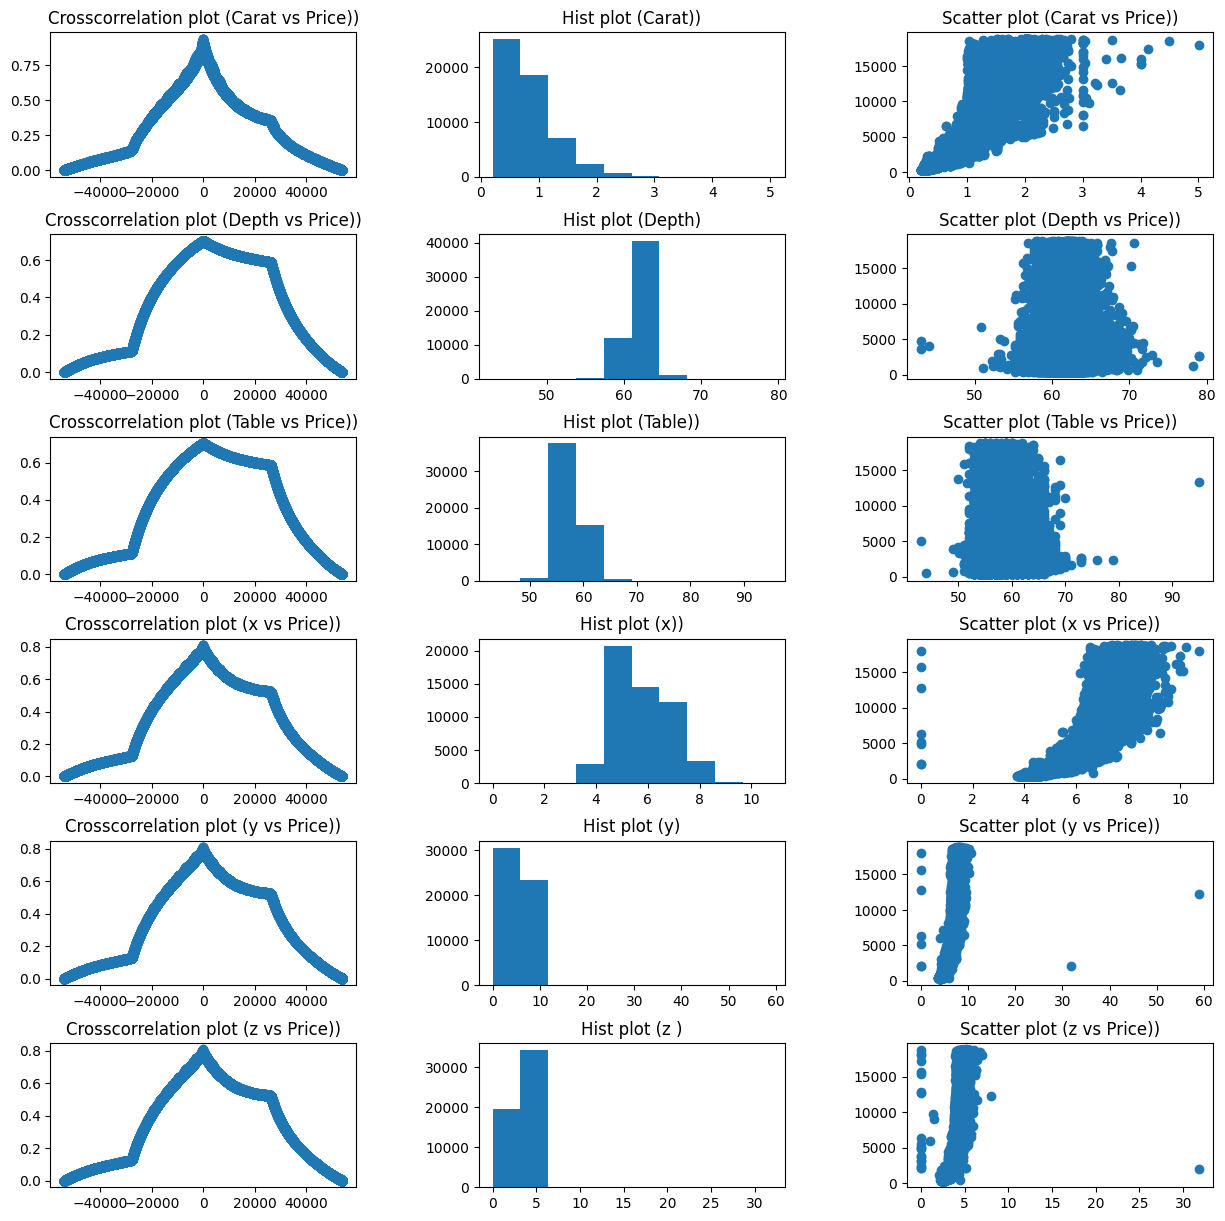

In [3]:
fig, axs  = plt.subplots(6,3, figsize=(15, 15))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
#Carat vs price
axs[0][0].set_title('Crosscorrelation plot (Carat vs Price))')
axs[0][0].xcorr(dataFrame['carat'],dataFrame['price'], maxlags=len(dataFrame['carat']) - 1, usevlines=False,normed=True, lw=2)
axs[0][1].set_title('Hist plot (Carat))')
axs[0][1].hist(dataFrame['carat'])
axs[0][2].set_title('Scatter plot (Carat vs Price))')
axs[0][2].scatter(dataFrame['carat'], dataFrame['price'])
#depth vs price
axs[1][0].set_title('Crosscorrelation plot (Depth vs Price))')
axs[1][0].xcorr(dataFrame['depth'],dataFrame['price'], maxlags=len(dataFrame['depth']) - 1, usevlines=False,normed=True, lw=2)
axs[1][1].set_title('Hist plot (Depth)')
axs[1][1].hist(dataFrame['depth'])
axs[1][2].set_title('Scatter plot (Depth vs Price))')
axs[1][2].scatter(dataFrame['depth'], dataFrame['price'])
#table vs price
axs[2][0].set_title('Crosscorrelation plot (Table vs Price))')
axs[2][0].xcorr(dataFrame['table'],dataFrame['price'], maxlags=len(dataFrame['table']) - 1, usevlines=False,normed=True, lw=2)
axs[2][1].set_title('Hist plot (Table))')
axs[2][1].hist(dataFrame['table'])
axs[2][2].set_title('Scatter plot (Table vs Price))')
axs[2][2].scatter(dataFrame['table'], dataFrame['price'])
axs[3][0].set_title('Crosscorrelation plot (x vs Price))')
axs[3][0].xcorr(dataFrame['x'],dataFrame['price'], maxlags=len(dataFrame['x']) - 1, usevlines=False,normed=True, lw=2)
axs[3][1].set_title('Hist plot (x))')
axs[3][1].hist(dataFrame['x'])
axs[3][2].set_title('Scatter plot (x vs Price))')
axs[3][2].scatter(dataFrame['x'], dataFrame['price'])
axs[4][0].set_title('Crosscorrelation plot (y vs Price))')
axs[4][0].xcorr(dataFrame['y'],dataFrame['price'], maxlags=len(dataFrame['y']) - 1, usevlines=False,normed=True, lw=2)
axs[4][1].set_title('Hist plot (y)')
axs[4][1].hist(dataFrame['y'])
axs[4][2].set_title('Scatter plot (y vs Price))')
axs[4][2].scatter(dataFrame['y'], dataFrame['price'])
axs[5][0].set_title('Crosscorrelation plot (z vs Price))')
axs[5][0].xcorr(dataFrame['z'],dataFrame['price'], maxlags=len(dataFrame['z']) - 1, usevlines=False,normed=True, lw=2)
axs[5][1].set_title('Hist plot (z )')
axs[5][1].hist(dataFrame['z'])
axs[5][2].set_title('Scatter plot (z vs Price))')
axs[5][2].scatter(dataFrame['z'], dataFrame['price'])


plt.show()



We decided to create a chart for some attributes in the dataset to understand them better. While it's challenging to draw final conclusions, we can highlight a few interesting observations:

Carat:
Initially, we analyzed the carat attribute versus price to compare price values based on weight. We observed that weight alone doesn't define the price, but there is a clear relationship, as heavier diamonds tend to be more expensive. Interestingly, some diamonds with the same weight are affected differently by price, indicating that price depends on other factors as well.

Depth:
When looking at the diamond's depth, we noticed that most diamonds have a depth of 60. However, a higher depth doesn't necessarily lead to a higher price, as even the diamond with the greatest depth is among the lower-priced ones.

Table:
The majority of diamonds have a table measurement between 60 and 70.

X, Y, Z:
These attributes are intriguing because they each have some outlier values. Notably, the length of the diamond is one of the attributes that show the most significant price variations. And we have some outliers so we need to take care of them.

Regarding cross-correlation, we find that the price will always be positively affected by each attribute, meaning that a higher value influences the price. Additionally, we observe a bidirectional relationship, where the attribute and the price strongly influence each other.


#### Boxplotting the dataframe

We do this to known the outliers values

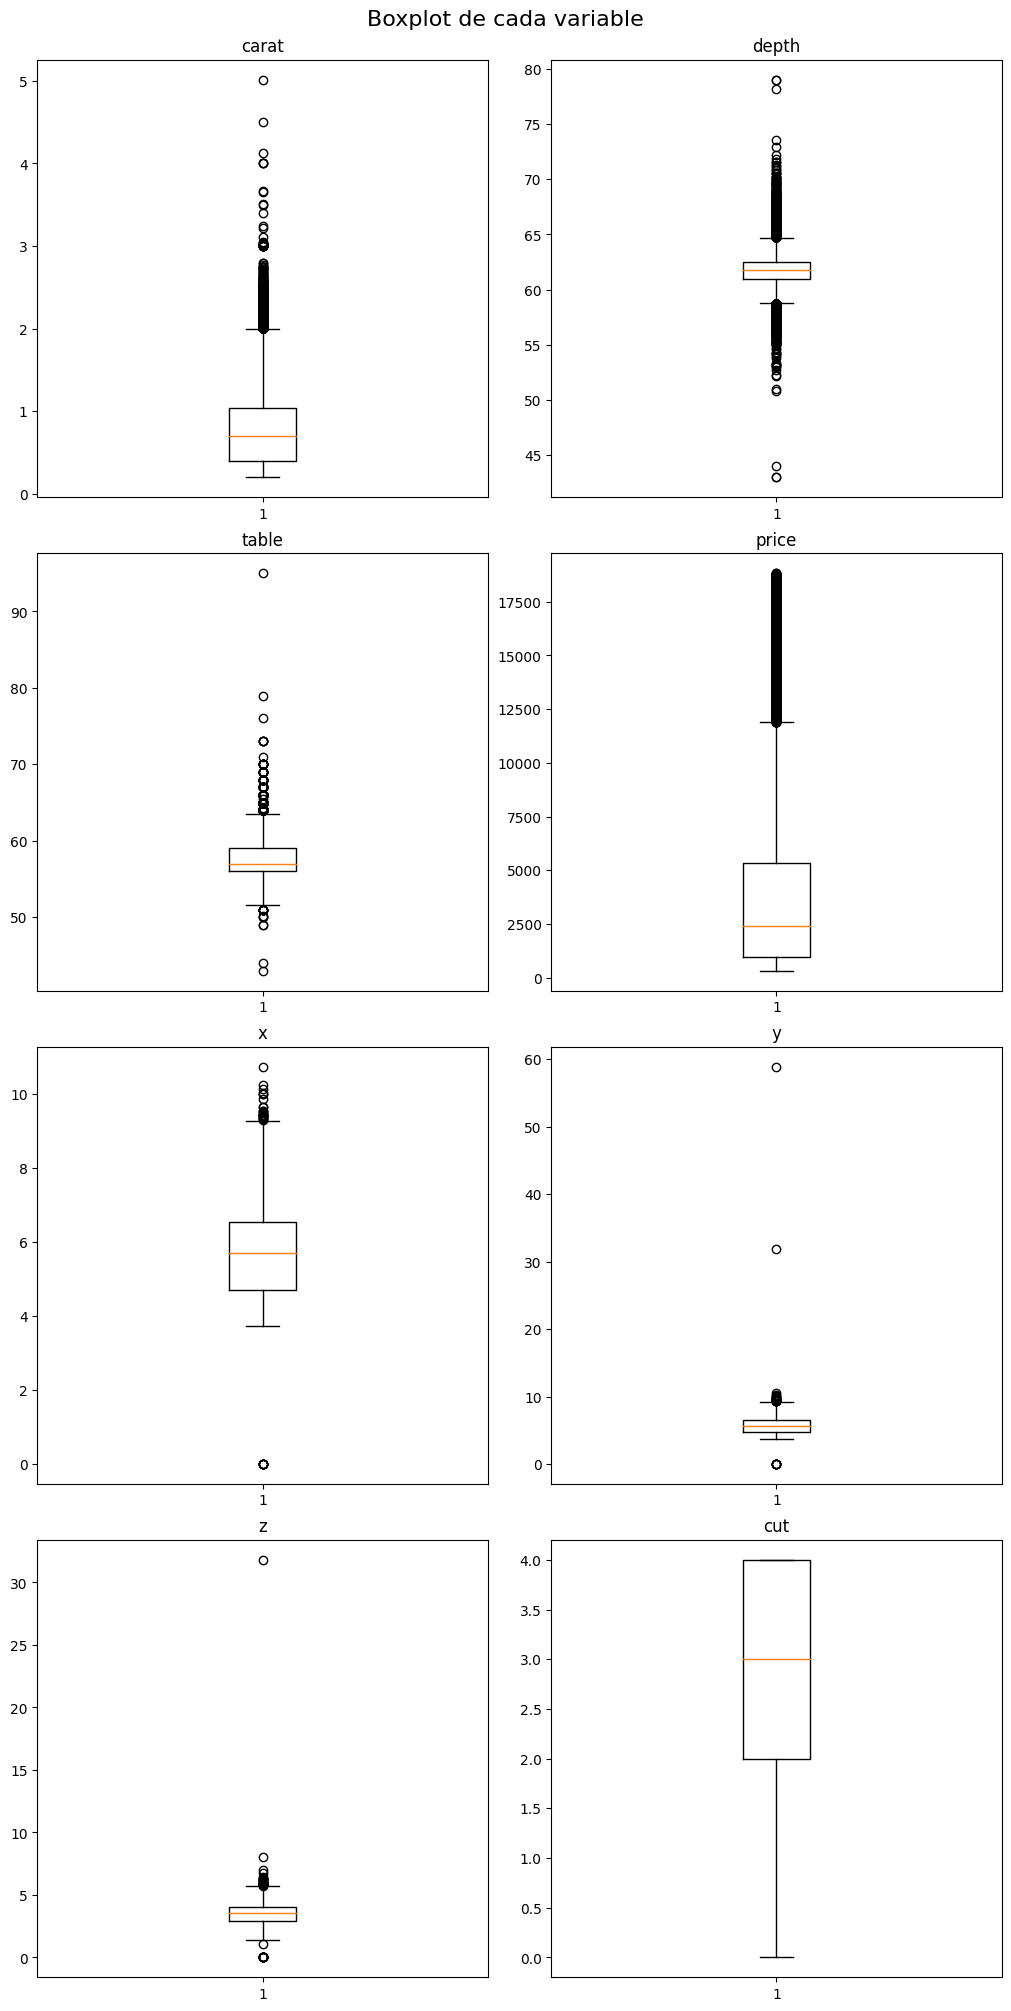

In [6]:
fig, axs = plt.subplots(4, 2, constrained_layout=True, figsize=(10, 20))
fig.suptitle('Boxplot de cada variable', fontsize=16)

n_cols = len(dataFrame.columns)  # Obtén el número de columnas en tu DataFrame
d = 0
for i in range(4):
    for j in range(2):
        if d >= n_cols:
            break
        axs[i, j].set_title(dataFrame.columns[d])
        axs[i, j].boxplot(dataFrame.iloc[:, d])  # No es necesario especificar vert=False para gráficos verticales
        d += 1

plt.show()

###  Conclusions
That's why we devised a strategy to prevent outlier values from affecting the accuracy of our code.

Regarding the behavior, it's easy to understand that the more weight a diamond has, the more table, the more carats, and the better the cut... The diamond's price will increase. Later on, we will conduct a more in-depth analysis of which variables affect our price more or less compared to others


_____

# 2 -  Preprocesing
______

#### Searching for not a number values and null values.

In [11]:

print(dataFrame.isna().any())
print(dataFrame.isnull().any())

carat    False
depth    False
table    False
price    False
x        False
y        False
z        False
cut      False
dtype: bool
carat    False
depth    False
table    False
price    False
x        False
y        False
z        False
cut      False
dtype: bool


Every false values means that every column is complete because does not have not a number and null values.

#### Removing outliers

In [3]:

# Create a new DataFrame to store data without outliers
dt_without_outliers = pd.DataFrame()

# Function to remove outliers from a specific column and update the DataFrame
def outliersByColumn(column_name: str, dt_with_outliers, dt_without_outliers):
    # Calculate the first quartile (Q1) and the third quartile (Q3)
    Q1 = dt_with_outliers[column_name].quantile(0.25)
    Q3 = dt_with_outliers[column_name].quantile(0.75)
    # Calculate the interquartile range (IQR)
    iqr = Q3 - Q1
    # Calculate the lower and upper limits to identify outliers
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q3 + 1.5 * iqr
    # Apply Winsorization to the column, replacing outliers with the limits
    dt_without_outliers[column_name] = np.where(dt_with_outliers[column_name] < lower_limit, lower_limit, np.where(dt_with_outliers[column_name] > upper_limit, upper_limit, dt_with_outliers[column_name]))
    return dt_without_outliers[column_name]



# Get the number of columns in the DataFrame
n_cols = len(dataFrame.columns)
d = 0

# Iterate through the subplots and plot boxplots for each column
for i in range(4):
    for j in range(2):
        if d >= n_cols:
            break
        col_name = dataFrame.columns[d]
        outliersByColumn(col_name, dataFrame, dt_without_outliers)
        d += 1

# Describe the DataFrame without outliers
dt_without_outliers.describe()


,carat,depth,table,price,x,y,z,cut
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.792558,61.749156,57.438561,3732.145690,5.731285,5.733311,3.538500,2.904097
std,0.457089,1.270254,2.161139,3436.769344,1.119956,1.111950,0.692494,1.116600
min,0.200000,58.750000,51.500000,326.000000,1.965000,1.990000,1.215000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000
max,2.000000,64.750000,63.500000,11885.625000,9.285000,9.270000,5.735000,4.000000


In this part, we are removing outliers using a technique that involves replacing outlier values with non-outlier values. The reason for removing outliers is to ensure that our data remains robust and that the presence of extreme or erroneous values does not unduly influence our analyses or machine learning models. Outliers can introduce noise and bias into our results, affecting the accuracy and reliability of our findings.

By applying this technique, we effectively "clamp" or "censor" the extreme values, replacing them with values that are within a reasonable range based on the non-outlier data. This helps in achieving a more representative and stable dataset for subsequent analysis, visualization, and modeling. Removing outliers is often a crucial step in data preprocessing to improve the overall quality of the data and the performance of machine learning algorithms.

#### Split into training test and validations sets

We use traint_test_split from sklearn libraries for straightfoward use

* First we have the **validation set** equals to *40%* and **train set** equals to *60%*. 
* Second we have that 40% of **validation set**  splited (40%/2 for validation and 40%/2 for test)

(Training 60%, validation  20%, test 20%)

Arguments: 
* Random_state = 10: This is a seed that we use without any specific criteria to be able to repeat the tests.
* Shuffle = true : to randomize the data.



In [4]:
X_train, X_split, y_train, y_split = train_test_split(dt_without_outliers[['carat','depth','table','x','y','z', 'cut']], dt_without_outliers['price'], test_size=0.40, random_state=10, shuffle=True)

X_val, X_test, y_val, y_test= train_test_split(X_split, y_split, test_size=0.5, random_state=10) # the shuffle is done by default

print("X train", X_train.shape, "\nHead: ", X_train.head(3))  
print("X_val",X_val.shape, "\nHead: ", X_val.head(3))
print ("X_test",X_test.shape,"\nHead: ", X_test.head(3))   


X train (32364, 7) 
Head:         carat  depth  table     x     y     z  cut
10379   1.13   62.3   57.0  6.67  6.61  4.14  4.0
46393   0.50   60.6   59.0  5.19  5.14  3.13  3.0
1757    0.83   62.1   57.0  6.03  5.95  3.72  4.0
X_val (10788, 7) 
Head:         carat  depth  table     x     y     z  cut
23619   1.41   62.7   56.0  7.18  7.10  4.48  3.0
7250    1.01   61.0   60.0  6.48  6.44  3.94  3.0
48232   0.58   60.6   56.0  5.42  5.38  3.27  3.0
X_test (10788, 7) 
Head:         carat  depth  table     x     y     z  cut
239     0.77   59.4   63.5  5.97  5.92  3.53  1.0
46774   0.56   61.9   55.0  5.31  5.29  3.28  4.0
49248   0.77   61.0   59.0  5.94  5.99  3.64  2.0


#### Attributes selection

To select the attributes we need to check which ones are the most significant attributes for the price, also check if there attributes that no will affect to much the price. This is important because could affect the training performance. So we choose the wrapper method to do this work.

Why wrapper method ?
* The main reason for using the 'Wrapper' approach in feature selection is that it relies on the direct evaluation of a machine learning model's performance on specific sets of attributes. This can be beneficial in situations where it is crucial to find the optimal feature set that maximizes the model's performance, as the 'Wrapper' method takes into account the complex interaction between features and how it affects the model's performance.

In [5]:


# Your DataFrame has already been loaded from the Excel file

# Define the columns of interest
columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut']

# Split the data into training and testing sets
X = dataFrame[columns]
y = dataFrame['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

best_accuracy = 0.0
best_combination = None
worst_accuracy = 1.0  # Initialize with the worst accuracy value (1.0 is perfect)
worst_combination = None  # Initialize with the worst combination

i = 1
# Evaluate combinations of 1 to 7 columns
for num_columns in range(1, 8):
    all_feature_combinations = list(combinations(columns, num_columns))

    for random_feature_combination in all_feature_combinations:
        X_train_subset = X_train[list(random_feature_combination)]
        X_test_subset = X_test[list(random_feature_combination)]

        # Train a model on the current subset
        clf = DecisionTreeClassifier(random_state=10)
        clf.fit(X_train_subset, y_train)
        y_pred = clf.predict(X_test_subset)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = list(random_feature_combination)

        if accuracy < worst_accuracy:
            worst_accuracy = accuracy
            worst_combination = list(random_feature_combination)
        if(i % 10 == 0 ):
            print(f"Current subset #{i}: {random_feature_combination}")
            print(f"Subset accuracy: {accuracy}")
        i += 1

print("Best feature subset:", best_combination)
print("Best accuracy:", best_accuracy)
print("Worst feature subset:", worst_combination)
print("Worst accuracy:", worst_accuracy)


KeyboardInterrupt: 

##### If you want to drop that columns. And do the train, test validation set again without that columns
Now we know the depth and table are the less significant attributes so we can try remove one or both of them. Run the next code 

In [6]:
X_train, X_split, y_train, y_split = train_test_split(dt_without_outliers[['carat','x','y','z', 'cut']], dt_without_outliers['price'], test_size=0.40, random_state=10, shuffle=True)

X_val, X_test, y_val, y_test= train_test_split(X_split, y_split, test_size=0.5, random_state=10) # the shuffle is done by default

print("X train", X_train.shape)
print("X_val",X_val.shape, "\nHead:\n", X_val.head(3))
print ("X_test",X_test.shape,"\nHead:\n", X_test.head(3))   

X train (32364, 5)
X_val (10788, 5) 
Head:
        carat     x     y     z  cut
23619   1.41  7.18  7.10  4.48  3.0
7250    1.01  6.48  6.44  3.94  3.0
48232   0.58  5.42  5.38  3.27  3.0
X_test (10788, 5) 
Head:
        carat     x     y     z  cut
239     0.77  5.97  5.92  3.53  1.0
46774   0.56  5.31  5.29  3.28  4.0
49248   0.77  5.94  5.99  3.64  2.0


#### Scaling dataset

we chose the z-score normalization technique because it is commonly used for the following reasons:

Robustness to Outliers: Standardization is less sensitive to outliers compared to Min-Max normalization, even though outliers were previously treated.

Simpler Interpretation: Standardization scales features to have a mean of 0 and a standard deviation of 1. This simplifies the interpretation of coefficients in linear models.

Information Preservation: Unlike Min-Max normalization, which confines features to a specific range (e.g., 0 to 1), standardization does not impose a particular range on the features. This can be advantageous in cases where the original feature scale is important

In [7]:
def z_score(df):
    return (df - df.mean()) / df.std()
X_train = z_score(X_train)
X_test = z_score(X_test)
X_val = z_score(X_val)
y_train = z_score(y_train)
y_test = z_score(y_test)
y_val = z_score(y_val)

# Print the mean and standard
print("X train", X_train.shape)
print("X_val",X_val.shape, "\nHead:\n", X_val.head(3))
print ("X_test",X_test.shape,"\nHead:\n", X_test.head(3))
print("y train", y_train.shape)
print("y_val",y_val.shape, "\nHead:\n", y_val.head(3))





X train (32364, 5)
X_val (10788, 5) 
Head:
           carat         x         y         z       cut
23619  1.348906  1.295015  1.230234  1.360488  0.088172
7250   0.476728  0.671287  0.638423  0.582878  0.088172
48232 -0.460862 -0.273217 -0.312060 -0.381935  0.088172
X_test (10788, 5) 
Head:
           carat         x         y         z       cut
239   -0.071632  0.188136  0.143532 -0.034107 -1.703865
46774 -0.522578 -0.394106 -0.416480 -0.390799  0.973543
49248 -0.071632  0.161671  0.205756  0.122838 -0.811396
y train (32364,)
y_val (10788,) 
Head:
 23619    2.305234
7250     0.136647
48232   -0.517976
Name: price, dtype: float64


___

# 3 - Experimental design
___

#### Neural Network Architecture:

We define the neural network architecture with 3 layers:
* The first layer will consist of 300 neurons.
* The second layer will consist of 100 neurons.
* The last layer will consist of 10 neurons.

The hidden layers will use **ReLu** function.
The last layer activation function will be the **identity function** or linear.


#### Dataset Split
We allocate 60% of the data for training, 20% for validation, and 20% for testing.
#### Hyperparameters:

##### Falta más... 
#### Precisión (accuracy) como métrica principal.
##### Falta más...


___

# 4 - Building Model
___


In [8]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='linear'))
network.summary()#Show the model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We can see the biases and weights for default in the next cell.

In [9]:
network.layers
hidden1 = network.layers[1]
weights, biases = hidden1.get_weights()
print("weights: ", weights)
print("biases: ", biases)

weights:  [[ 0.08675911 -0.09199836  0.06748243 ...  0.02589687 -0.02957544
  -0.10896753]
 [ 0.0341194   0.10699459 -0.00577831 ... -0.10093525 -0.00194938
   0.11506446]
 [-0.11558732 -0.04898756  0.11499112 ...  0.08024513 -0.01297134
   0.10213042]
 ...
 [ 0.09590528 -0.08807826 -0.02902529 ... -0.02673292 -0.02393505
  -0.07101244]
 [-0.09014815 -0.06679815  0.00928315 ...  0.03801473 -0.06545705
   0.04300665]
 [ 0.11410796 -0.03035597  0.08936521 ...  0.0883173   0.11116081
   0.01753334]]
biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="tp3-redes-neuronales",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)


___

# (n) - Results tracking tool
___

___

# (n) - Conclusions
___

En una celda de texto al final del cuaderno, incluya sus conclusiones más importantes del experimento y algunos de los gráficos que genera la herramienta seleccionada, junto con su interpretación de los mismos. 